<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/Holt%60s_Linear_Trend_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-05-19 21:38:18--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-05-19 21:38:18 (20.9 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [3]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [6]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

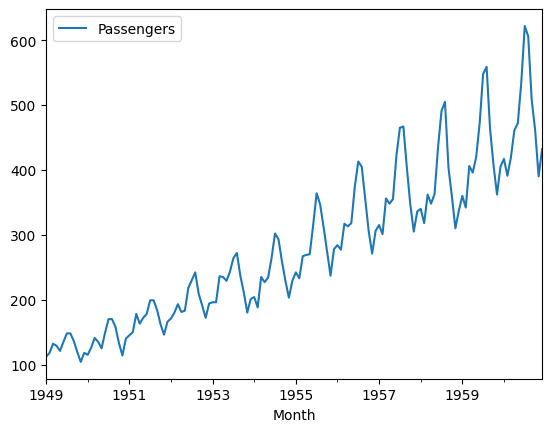

In [9]:
df.plot()

In [13]:
from statsmodels.tsa.holtwinters import Holt

In [16]:
holt = Holt(
    df['Passengers'],
    initialization_method='legacy-heuristic' )

In [18]:
res_h = holt.fit()

In [19]:
df['Holt'] = res_h.fittedvalues

<Axes: xlabel='Month'>

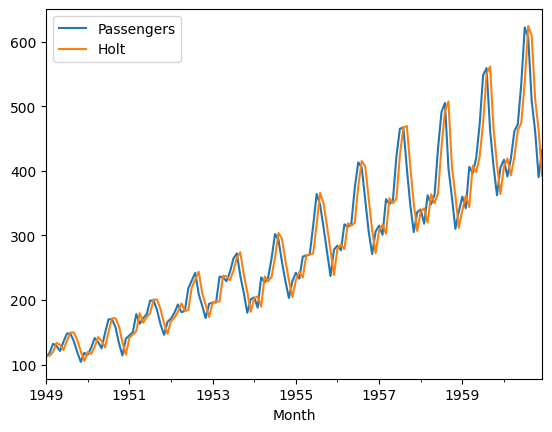

In [21]:
df[['Passengers','Holt']].plot()

In [22]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [23]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')
res_h = holt.fit()
df.loc[train_idx, 'Holt'] = res_h.fittedvalues

In [26]:
df.loc[test_idx, 'Holt'] = res_h.forecast(N_test)

<Axes: xlabel='Month'>

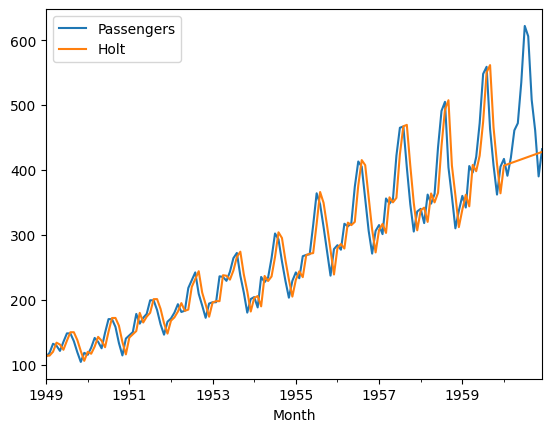

In [27]:
df[['Passengers','Holt']].plot()